In [3]:
import pandas as pd
from get_milestones import main
from path import Path
import os
import time
from tqdm.auto import tqdm

In [55]:
# control slugs
slugs = [
    'zamknijmy-fermy-futrzarskie-w-polsce',
    'jarosław-kaczyński-let-s-shut-down-all-fur-farms-in-poland',
    'congress-impeach-donald-j-trump-ca5eea26-3110-4f4b-9a7b-89a43caf1a7a',
    'do-not-impeach-president-trump',
    'time-name-greta-thunberg-time-person-of-the-year',
    'abc-save-once-upon-a-time',
    'us-state-department-and-congress-free-alexei-navalny',
    'st-matthew-s-cofe-primary-school-allow-year-5-child-the-reasonable-adjustment-to-wear-his-mask-to-school-during-covid',
    'greg-abbott-reinstate-the-texas-covid-19-mask-mandate',
    'julius-jones-is-innocent-don-t-let-him-be-executed-by-the-state-of-oklahoma',
    'save-lgbt-refugees-in-turkey-who-are-abandoned-in-unsafe-conditions-for-years-with-no-help',
    'mateusz-morawiecki-pass-laws-that-would-protect-lgbt-people-in-poland-and-abolish-current-anti-lgbt-laws',
    'saverudraksh-drharshvardhan-please-save-3-year-old-rudraksh-waive-duties-taxes-on-life-saving-drug',
    'we-the-people-of-michigan-no-new-gas-tax-in-michigan',
    'ugc-cancel-all-university-exams',
    'google-inc-google-put-palestine-on-your-maps',
]

In [56]:
error_slugs = set()
for slug in tqdm(slugs):
    if not isinstance(slug, str):
        continue
    args = type('obj', (object,), {'petition_slug': slug, 'delay_ms': 100})
    with Path('./data'):
        try:
            main(args)
        except Exception as e:
            print(slug, e)
            error_slugs.add(slug)

  0%|          | 0/16 [00:00<?, ?it/s]

File already exists, doing nothing!
File already exists, doing nothing!
File already exists, doing nothing!
File already exists, doing nothing!
File already exists, doing nothing!
File already exists, doing nothing!
File already exists, doing nothing!
File already exists, doing nothing!
File already exists, doing nothing!
File already exists, doing nothing!
Regexp "petition":{"id":"([0-9]+)" failed
Petition slug save-lgbt-refugees-in-turkey-who-are-abandoned-in-unsafe-conditions-for-years-with-no-help resolved to id 13242870
Response: 200 OK
True YXJyYXljb25uZWN0aW9uOjEx
Response: 200 OK
True YXJyYXljb25uZWN0aW9uOjIz
Response: 200 OK
False YXJyYXljb25uZWN0aW9uOjI2
Data saved to change_org_milestones_petition_slug_save-lgbt-refugees-in-turkey-who-are-abandoned-in-unsafe-conditions-for-years-with-no-help_at_20211112-110454.csv
Data saved to change_org_milestones_petition_slug_save-lgbt-refugees-in-turkey-who-are-abandoned-in-unsafe-conditions-for-years-with-no-help_at_20211112-110454.jso

In [57]:
# first two are not relevant
# the second one does not have public milestones
error_slugs

set()

In [58]:
# merging everything into a single dataframe

In [59]:
files = os.listdir('data')
slugs_set = set(slugs)
prefix = 'change_org_milestones_petition_slug_'
suffix = '.csv'

files = [f for f in files if f.startswith(prefix)]

def fn_to_slug(fn):
    return fn[len(prefix):-len('_at_20211112-104655.csv')]

files = [f for f in tqdm(files) if fn_to_slug(f) in slugs_set]
def read_csv(f):
    df = pd.read_csv(f)
    df['petition__slug'] = fn_to_slug(f.split('/')[2])
    return df
df = pd.concat([read_csv('./data/' + f) for f in tqdm(files)])

  0%|          | 0/610 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

# Optional: plotting all timelines

In [60]:
from matplotlib import pyplot as plt

In [61]:
df_ = df[df['__typename'] == 'MilestonePetitionUpdate'].copy()

In [62]:
df_['createdAt'] = pd.to_datetime(df_.createdAt)

  0%|          | 0/16 [00:00<?, ?it/s]

No handles with labels found to put in legend.


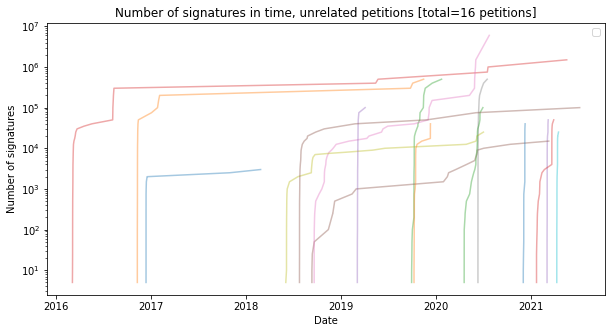

In [63]:
plt.figure(figsize=(10, 5))
plt.title('Number of signatures in time, unrelated petitions [total=%d petitions]' % len(set(df_.petition__slug)))
for petition__slug, group in tqdm(df_.groupby('petition__slug')):
    kwargs = {}#'label': petition__slug}
    plt.plot(group.createdAt, group.signatureCount, alpha=0.4, **kwargs)
    i += 1
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Number of signatures')
plt.legend()
plt.savefig('./figures/unrelated_petitions_signatures_in_time.png', bbox_inches='tight')
plt.show()

In [64]:
len(df_)

508